# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


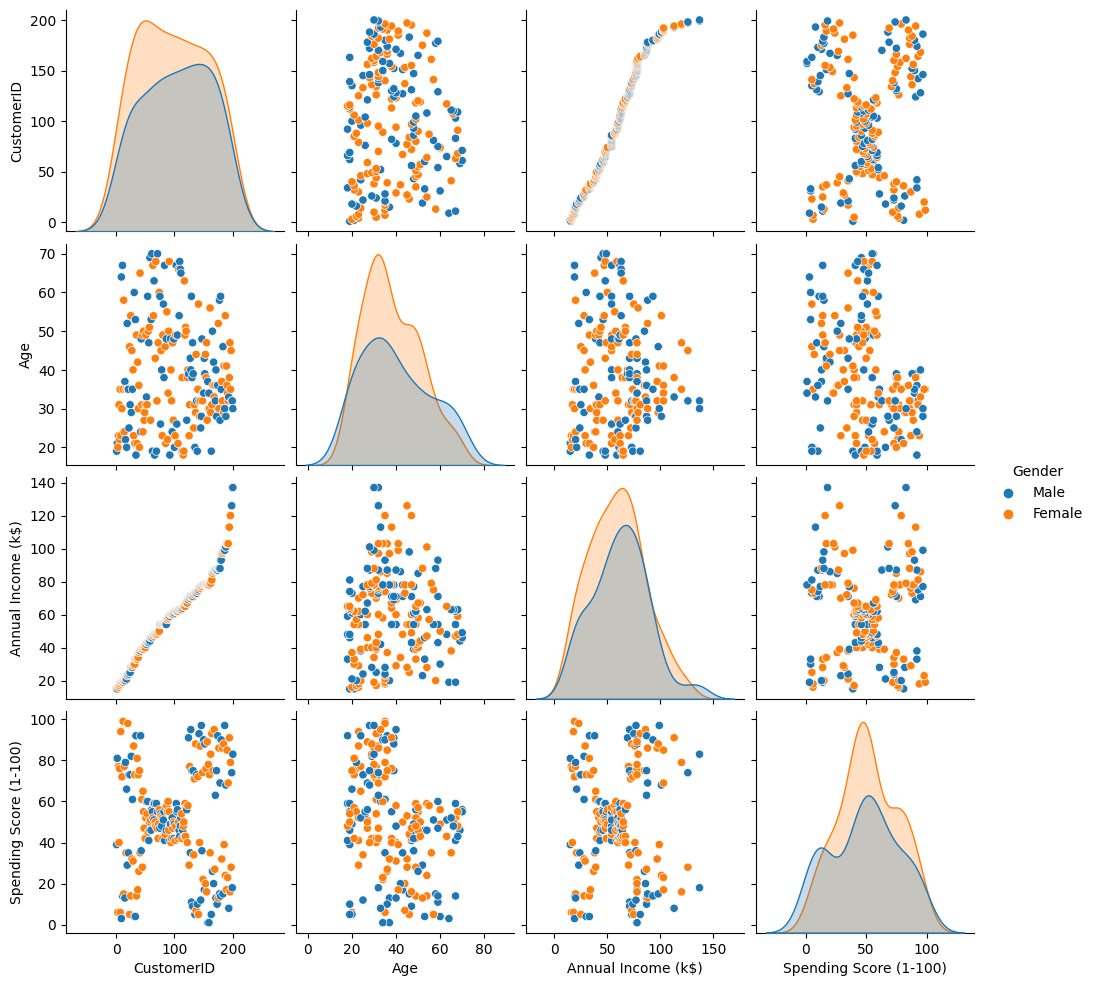

In [3]:
sns.pairplot(df,hue="Gender")

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

-------------------------------------------------------------------------------------------------------------------------------

I followed this sites steps to perform an hierarchical clustering https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

In [4]:
#removing categorical features
X = df.drop(['Gender','CustomerID'],axis=1)

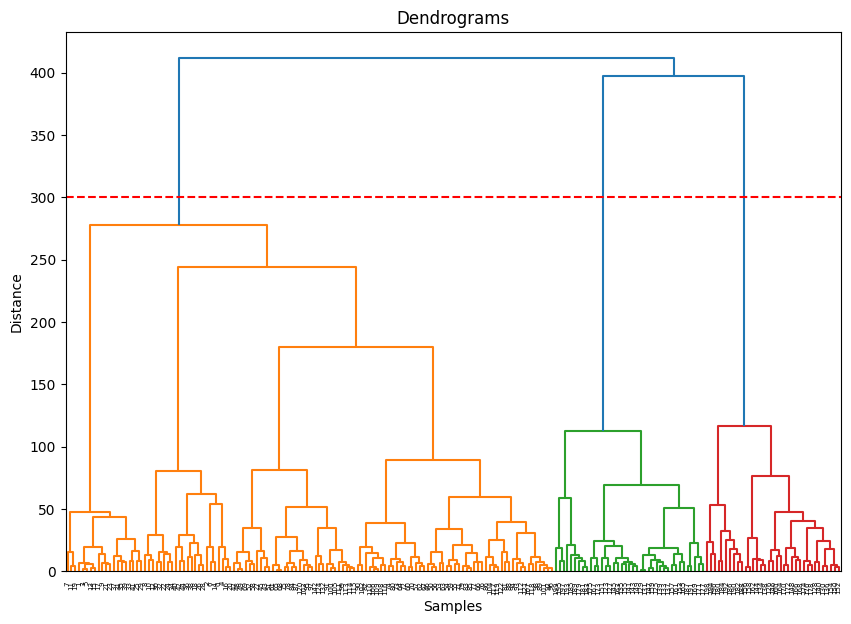

In [5]:
#plotting dendrograms to determine how many clusters to make
#x-axis = samples, y-axis = distance between the samples
#the vertical line with the most distance is the blue one so we cut at this distance and see that we need 2 clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=300, color='r', linestyle='--')

In [30]:
#Applying hierarchical clustering to 2 clusters, 0 and 1
from sklearn.cluster import AgglomerativeClustering

#clustering module
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  

#fitting the data
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

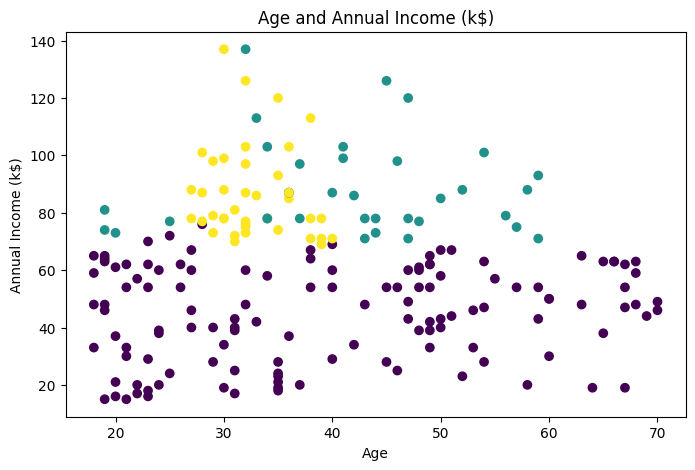

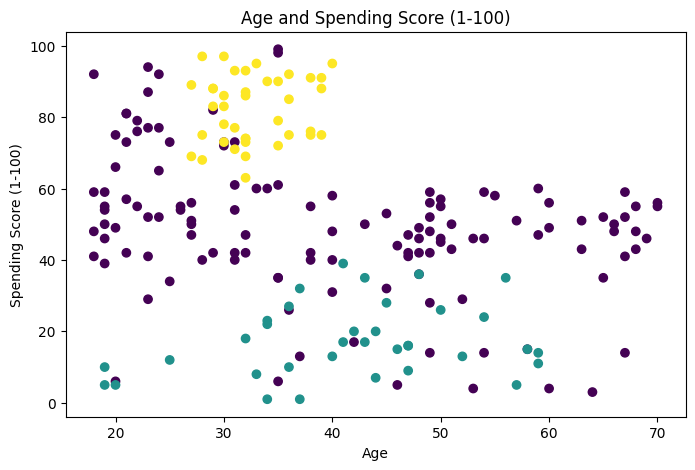

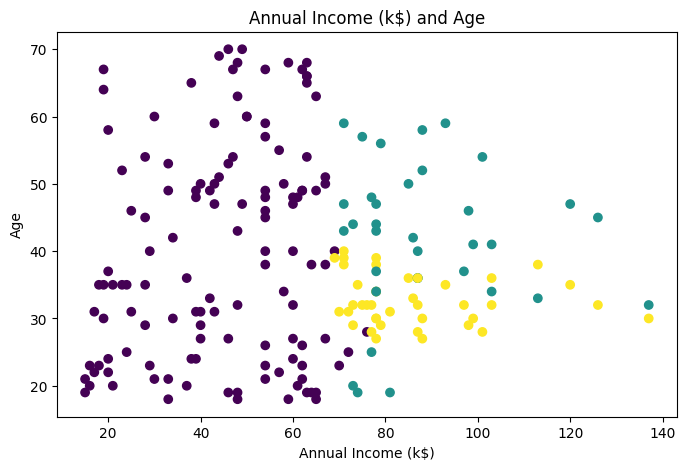

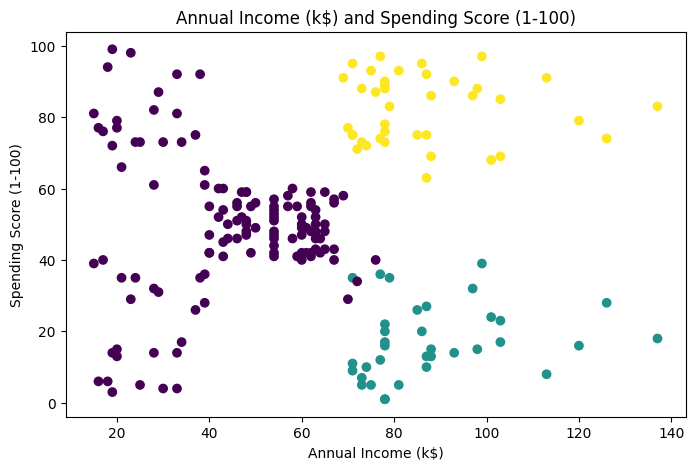

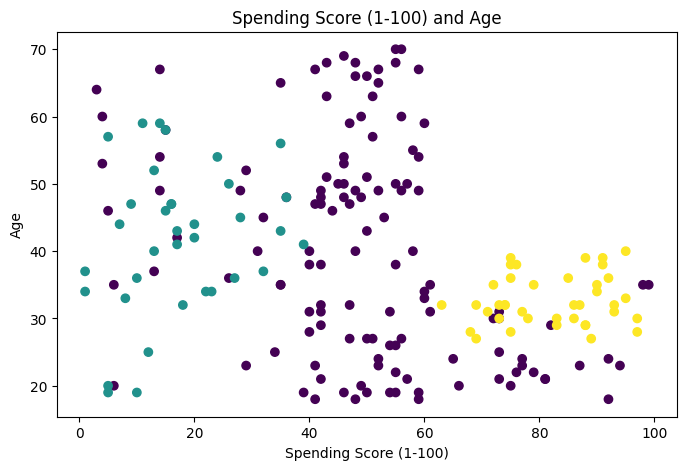

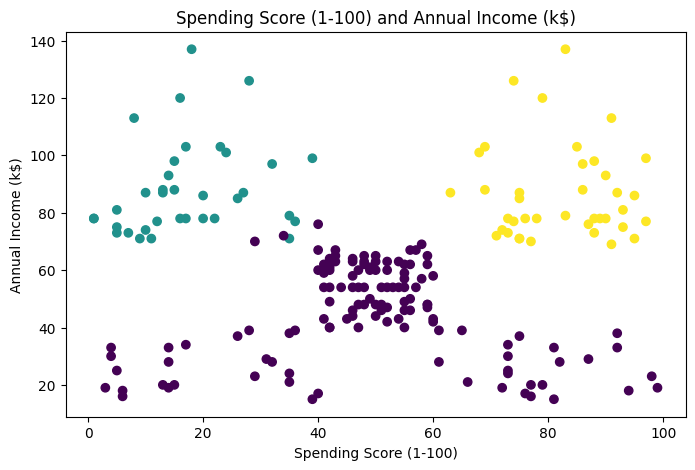

In [31]:
for i in X:
    for u in X:
        if u in i:
            continue
            
        plt.figure(figsize=(8, 5))
        #fitting the clusters labels to the plot
        plt.scatter(X[i], X[u], c=cluster.labels_) 
        plt.title(f'{i} and {u}')
        plt.xlabel(i)
        plt.ylabel(u)
        plt.show()

In [36]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, cluster.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.381


# Conclusions

Hierarchical clustering is meant to segment clients together by finding similarities from many groups,
here we have a big group that we have to separate, si hierarchical is not optimal